<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>DE NORMALE VERDELING: TOEPASSING</h1> 
    </font>
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>WEERSTATION</h2> 
    </font>
</div>

<div class="alert alert-block alert-success"> 
        De normale verdeling is een kansverdeling die voor heel wat stochastische variabelen van toepassing is. In deze notebook wordt dit geïllustreerd a.d.h.v. enkele grote datasets.
</div>

### Importeer de nodige modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

<div>
    <font color=#690027 markdown="1">
        <h2>1. Oefening weerstation</h2> 
    </font>
</div>

De data in een dataset zijn in veel gevallen bij benadering normaal verdeeld. <br>Bij het werken met grote datasets kan het gebruikmaken van een computer je veel tijd besparen. 

Beschouw de dataset `weather_in_Antwerp.csv` in de map `data` [1]. Deze dataset bevat metingen van het weer in Antwerpen op verschillende tijdstippen.

**Doorheen de volgende opdrachten ga je op zoek naar de kans dat de luchtdruk lager is dan 1 bar (1000 mbar of 1000 hPa).** <br>

Je doet dit op *twee manieren*: eens zonder en eens met de normale verdeling.

### Opdracht 1.1

-  Laad de dataset in en teken een duidelijk histogram van de relatieve frequenties van de luchtdruk (`"barometer"`).

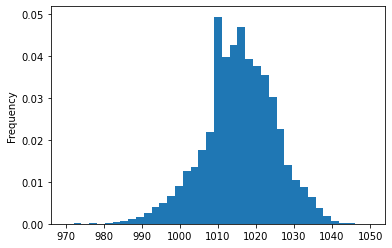

In [2]:
# voorbeeldcode
weer = pd.read_csv("data/weather_in_Antwerp_2012to2016.csv")
x = np.linspace(970, 1050, 40)
luchtdruk = weer["barometer"]

plt.figure()
luchtdruk.plot(kind="hist", bins=x, density=True)
plt.show()

- Laat de elementen van `luchtdruk' zien.

In [3]:
# voorbeeldcode
print(luchtdruk)

0        1011.0
1        1011.0
2        1011.0
3        1010.0
4        1010.0
          ...  
83914    1036.0
83915    1036.0
83916    1036.0
83917    1036.0
83918    1036.0
Name: barometer, Length: 83919, dtype: float64


### Opdracht 1.2

-  Verwijs met een nieuwe variabele naar alle waarden uit `"barometer"` die kleiner zijn dan 1 bar. 

<div class="alert alert-block alert-warning"> 
Herinner je dat je in <i>Statistiek in Python 3: Data analyseren</i> slicing hebt gebruikt om waarden uit een kolom te filteren.
</div>

In [4]:
# voorbeeldcode
luchtdruk_lager1bar = luchtdruk[luchtdruk<1000]
print(luchtdruk_lager1bar)

193      999.0
194      998.0
195      998.0
196      998.0
197      997.0
         ...  
82074    999.0
82075    999.0
82076    999.0
82077    999.0
82078    999.0
Name: barometer, Length: 4623, dtype: float64


-  Bereken de verhouding van de lengte van de gefilterde kolom tot de lengte van de oorspronkelijke kolom.

In [5]:
# voorbeeldcode
len(luchtdruk_lager1bar) / len(weer)

0.05508883566296071

- Wat is de betekenis van dit getal?

Antwoord:

Antwoord: Het percentage van de metingen dat een luchtdruk onder de 1 bar opleverde.

-  Je bekwam een goede benadering van de kans dat de luchtdruk in Antwerpen lager is dan 1 bar. Waarom spreek je hier van een benadering?

Antwoord:

Antwoord: De kans is gebaseerd op een eindig aantal metingen.

-  Hoe kan je ervoor zorgen dat deze benadering nauwkeuriger wordt?

Antwoord: 

Antwoord: Door meer metingen te doen, kan de kans nauwkeuriger worden.

-  Maak via het histogram een schatting van het gemiddelde en de standaardafwijking van de luchtdruk.

Antwoord: 

Antwoord: Schatting van het gemiddelde: ongeveer 1020 mbar (maximum van het histogram). <br>Schatting van de standaardafwijking: ongeveer 10 mbar (afstand tussen gemiddelde en buigpunt).

### Opdracht 1.3

Je berekent nu dezelfde kans door de data te benaderen door een normale verdeling. 

-  Bereken de exacte gemiddelde luchtdruk met Python. 
-  Bereken ook de standaardafwijking van de luchtdruk. Dat is mogelijk met de functie `std()` (van het Engelse *standard deviation*), analoog aan de `mean()`-functie. 
-  Verwijs naar de resultaten met de variabelen `luchtdruk_gemiddelde` en `luchtdruk_standaardafwijking`.

<div class="alert alert-block alert-warning"> 
Kijk nog eens terug naar het notebook <i>Statistiek in Python 3: Data analyseren</i> als je niet meer weet hoe je het gemiddelde van de elementen van een kolom moet berekenen.
</div>

In [6]:
# voorbeeldcode
luchtdruk_gemiddelde = weer["barometer"].mean()
luchtdruk_standaardafwijking = weer["barometer"].std()

- Komen de waarden overeen met je schatting?

In [7]:
# voorbeeldcode
print(luchtdruk_gemiddelde, luchtdruk_standaardafwijking)

1015.732206702579 9.546017272280103


Antwoord:

Antwoord: Ja, ze liggen vrij goed in de buurt.

- Gebruik dit gemiddelde en deze standaardafwijking als parameters voor een normale verdeling. <br> Schrijf code om deze normale verdeling samen met het histogram te tonen in een grafiek. 

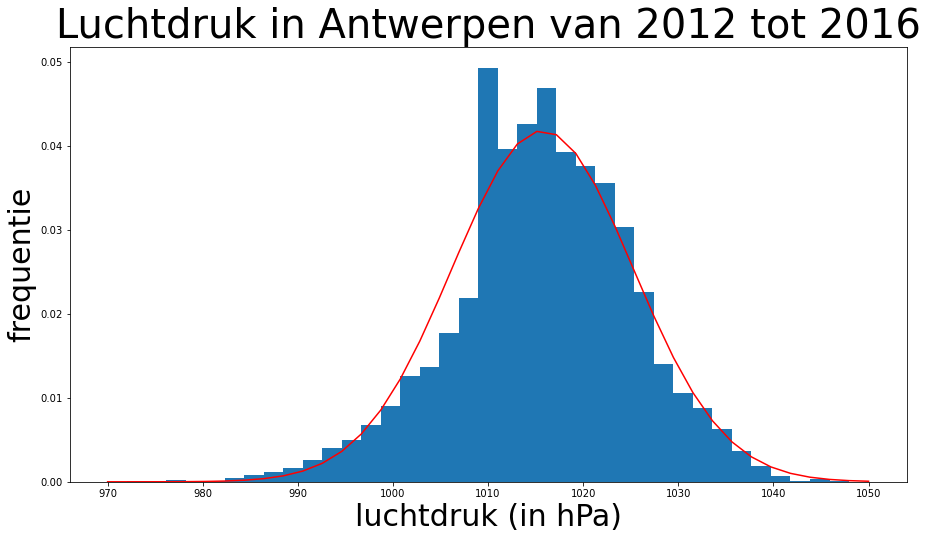

In [8]:
# voorbeeldcode
gemiddelde = luchtdruk_gemiddelde
standaardafwijking = luchtdruk_standaardafwijking

x = np.linspace(970, 1050, 40)                                       # x-waarden genereren om grafiek te tekenen
y = norm.pdf(x, gemiddelde, standaardafwijking)  # bereken funciewaarden van normale verdeling

# grafiek

plt.figure(figsize=(15,8))

luchtdruk.plot(kind="hist", bins=x, density=True)  # teken histogram
plt.plot(x, y, color="red")                        # teken normale verdeling

plt.title("Luchtdruk in Antwerpen van 2012 tot 2016", fontsize=40)
plt.xlabel("luchtdruk (in hPa)", fontsize=30)
plt.ylabel("frequentie", fontsize=30)

plt.show()

Je ziet dat de luchtdruk inderdaad bij benadering normaal verdeeld is.

Om op een gemakkelijke manier de kans te berekenen dat een normaal verdeelde stochastische variabele kleiner is dan een bepaalde waarde, gebruik je de cumulatieve dichtheidsfunctie. 

- Gebruik de cumulatieve dichtheidsfunctie om de kans te berekenen dat de luchtdruk kleiner is dan 1000 mbar.  

In [9]:
# voorbeeldcode
norm.cdf(1000, luchtdruk_gemiddelde, luchtdruk_standaardafwijking)

0.049672356318829575

- Hoeveel verschillen de resultaten van beide methoden?

Antwoord: 

Antwoord: 0.00542

- Wat betekent dat voor die kans?

Antwoord: 

Antwoord: Zowel het werken met het histogram, als het werken met de normale verdeling zijn benaderingen van de werkelijkheid. De normale verdeling is een wiskundig model voor de werkelijkheid. In de realiteit zullen de gegevens nooit exact overeen komen met een normale verdeling. <br>
Dus beide berekende waarden zijn een schatting van de werkelijke kans.

### Opdracht 1.4

Gebruik de normale verdeling om volgende kansen te berekenen:
* de kans dat de luchtdruk hoger is dan 1040 mbar;
* de kans dat de luchtdruk tussen 1000 mbar en 1010 mbar ligt.

In [10]:
# voorbeeldcode
kans_luchtdruk_hogerdan1040 = 1 - norm.cdf(1040, luchtdruk_gemiddelde, luchtdruk_standaardafwijking)
kans_luchtdruk_van1000tot1010 = norm.cdf(1010, luchtdruk_gemiddelde, luchtdruk_standaardafwijking) - norm.cdf(1000, luchtdruk_gemiddelde, luchtdruk_standaardafwijking)

print("De kans dat de luchtdruk hoger is dan 1040 mbar is " + str(kans_luchtdruk_hogerdan1040) + ".")
print("De kans dat de luchtdruk tussen 1000 mbar en 1010 mbar ligt " + str(kans_luchtdruk_van1000tot1010) + ".") 

De kans dat de luchtdruk hoger is dan 1040 mbar is 0.005508007599729803.
De kans dat de luchtdruk tussen 1000 mbar en 1010 mbar ligt 0.22442033934227115.


<div>
    <font color=#690027 markdown="1">
        <h2>2. Oefening: Misleidende grafieken</h2> 
    </font>
</div>

Je zag eerder dat je de nauwkeurigheid van de schatting van een kans kon verhogen door meer data te verzamelen. Dit leidt echter niet altijd tot een schatting die beter overeenkomt met de realiteit. Dit wordt geillustreerd in de volgende opdrachten.

### Opdracht 2.1

De dataset uit de vorige oefening bevat data van een weerstation dat per half uur een meting registreerde van 2012 tot 2016. Stel dat een onderzoeksteam de nauwkeurigheid van de berekeningen wil verhogen door metingen tot 2019 aan de dataset toe te voegen, maar dat ze door een fout echter enkel de metingen van de maanden mei tot augustus toevoegen. 

**Kijk wat het effect is van deze fout op de schatting van de temperatuur.**

-  Laad daartoe eerst de geüpdatete dataset `weather_in_Antwerp_2012to2019.csv` in de map `data` in [1]. 
-  Genereer een histogram van de temperatuur voor de dataset `weather_in_Antwerp_2012to2016` en voor `weather_in_Antwerp_2012to2019`. De temperatuur is gegeven in °C in de kolom `temp`.

<div class="alert alert-block alert-danger"> 
Laat de histogrammen in een apart grafiekscherm verschijnen.
</div>

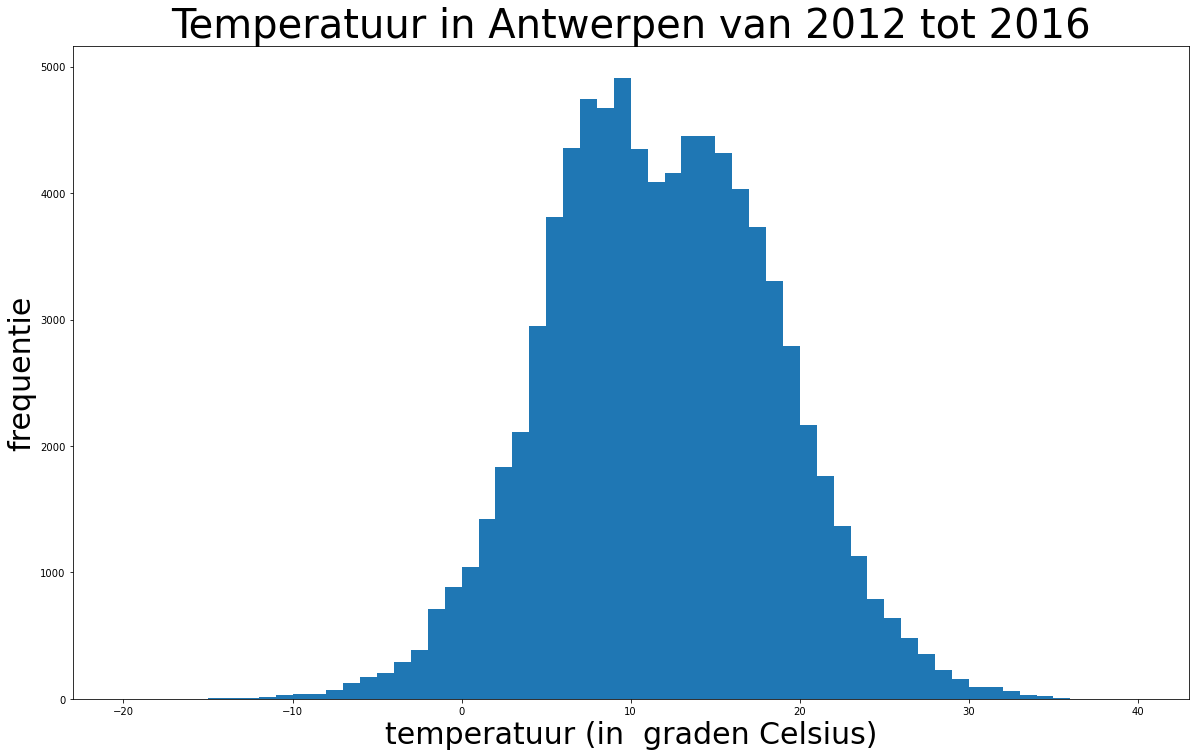

In [11]:
# voorbeeldcode
weer_tot2016 = pd.read_csv("data/weather_in_Antwerp_2012to2016.csv")
weer_tot2019 = pd.read_csv("data/weather_in_Antwerp_2012to2019.csv")

x = np.linspace(-20, 40, 61)

plt.figure(figsize=(20,12))

weer_tot2016["temp"].plot(kind="hist",bins=x)

plt.title("Temperatuur in Antwerpen van 2012 tot 2016", fontsize=40)
plt.xlabel("temperatuur (in  graden Celsius)", fontsize=30)
plt.ylabel("frequentie", fontsize=30)

plt.show()

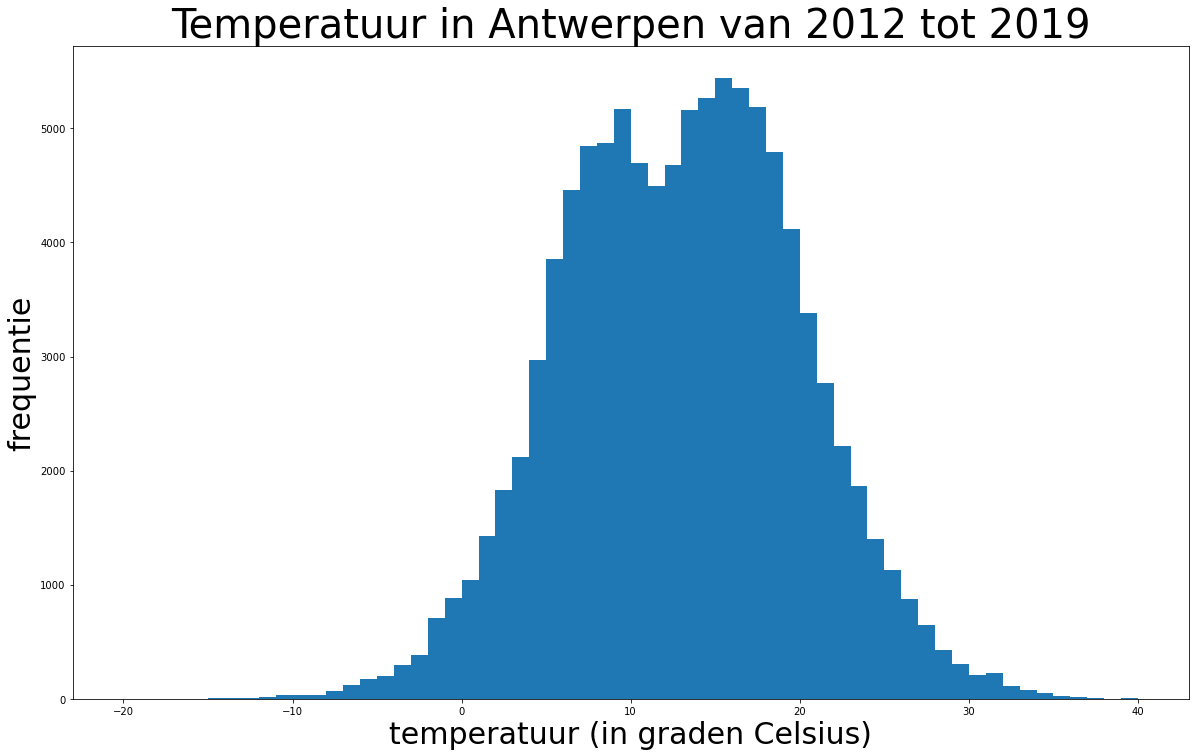

In [12]:
# voorbeeldcode

plt.figure(figsize=(20,12))

weer_tot2019["temp"].plot(kind="hist",bins=x)

plt.title("Temperatuur in Antwerpen van 2012 tot 2019", fontsize=40)
plt.xlabel("temperatuur (in graden Celsius)", fontsize=30)
plt.ylabel("frequentie", fontsize=30)

plt.show()

- Welke verschillen tussen de twee datasets kan je aflezen? Let op het gemiddelde en de standaardafwijking.

Antwoord:

Antwoord: In de 2019 dataset zijn er meer hoge temperaturen.

### Opdracht 2.2

-  Bereken het gemiddelde en de standaardafwijking van beide datasets.
-  Verwijs ernaar met de variabelen `temperatuur_gemiddelde_2016`, `temperatuur_gemiddelde_2019`, `temperatuur_standaardafwijking_2016` en `temperatuur_standaardafwijking_2019`.

In [13]:
# voorbeeldcode
temperatuur_gemiddelde_2016 = weer_tot2016["temp"].mean()
temperatuur_gemiddelde_2019 = weer_tot2019["temp"].mean()
temperatuur_standaardafwijking_2016 = weer_tot2016["temp"].std()
temperatuur_standaardafwijking_2019 = weer_tot2019["temp"].std()

- Schrijf code om een grafiek van twee normale verdelingen te genereren. Een blauwe curve benadert de dataset tot 2016 en een rode curve die tot 2019.

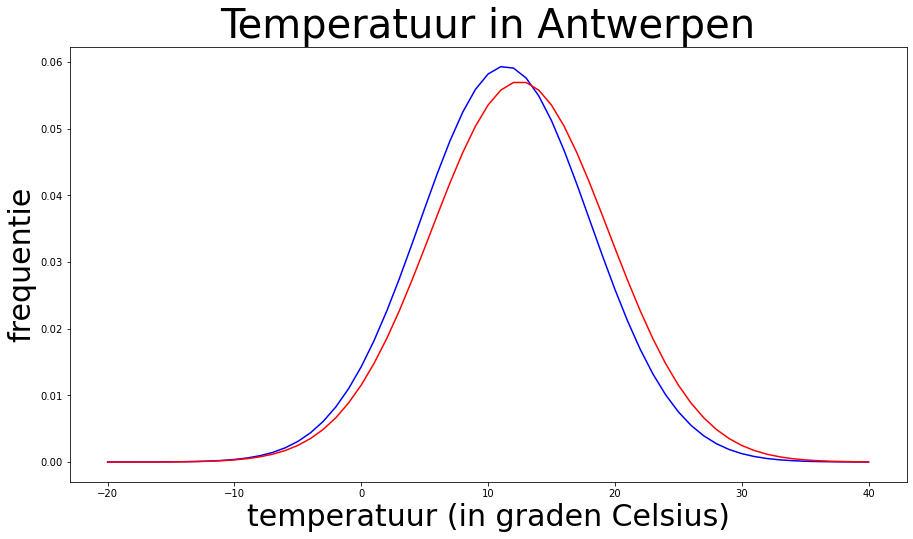

In [14]:
# voorbeeldcode
x = np.linspace(-20, 40, 61)           # x-waarden genereren om grafiek te tekenen
gausskromme_2016 = norm.pdf(x, temperatuur_gemiddelde_2016, temperatuur_standaardafwijking_2016)
gausskromme_2019 = norm.pdf(x, temperatuur_gemiddelde_2019, temperatuur_standaardafwijking_2019)

plt.figure(figsize=(15,8))

plt.plot(x, gausskromme_2016, color="blue")  # teken eerste normale verdeling 
plt.plot(x, gausskromme_2019, color="red")   # teken tweede normale verdeling

plt.title("Temperatuur in Antwerpen", fontsize=40)
plt.xlabel("temperatuur (in graden Celsius)", fontsize=30)
plt.ylabel("frequentie", fontsize=30)

plt.show()

### Opdracht 2.3

Bereken de kans dat de temperatuur hoger is dan 30 °C. 
-  Gebruik eerst een normale verdeling op basis van de dataset tot 2016 om de kans te benaderen. 
-  Gebruik nadien de geüpdate dataset tot 2019.

In [15]:
# voorbeeldcode
kans_2016 = 1 - norm.cdf(30, temperatuur_gemiddelde_2016, temperatuur_standaardafwijking_2016)
kans_2019 = 1 - norm.cdf(30, temperatuur_gemiddelde_2019, temperatuur_standaardafwijking_2019)
print(kans_2016)
print(kans_2019)

0.002756566969911778
0.006166897611336486


De geschatte kans dat een temperatuur hoger dan 30 °C in de loop van een jaar voorkomt is groter bij de foutief geüpdatete dataset.

Er worden verschillende termen gebruikt om dit fenomeen te benoemen, zoals **selectief winkelen**, **selectieve bias** of **cherrypicking**. Soms gebeurt het onbewust, maar al te vaak wordt het gebruikt om resultaten te verdraaien. <br>
Denk maar aan klimaatontkenners die bijvoorbeeld meer metingen uit de wintermaanden aan de dataset kunnen toevoegen en zo concluderen dat de klimaatverandering niet bestaat. Het is dus belangrijk om steeds de bron van de data uit een onderzoek te checken voor je zelf conclusies trekt.

### Referentielijst

[1] Weather dataset in Antwerp, Belgium. https://www.kaggle.com/datasets/ramima/weather-dataset-in-antwerp-belgium<br>
Data gebruikt met toestemming van CustomWeather, eigenaar van de data www.customweather.com gebruikt in deze dataset.

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

Notebook Python in wiskunde - Statistiek, van D. De Bolster, F. wyffels & N. Gesquière, is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.